In [6]:
from __future__ import print_function, division
import os
import sys
import timeit
from six.moves import cPickle as pickle

import numpy as np
import pandas as pd

import theano
import theano.tensor as T

from lib.deeplearning import deepbeliefnet

os.chdir('/home/ekhongl/Codes/DL - Topic Modelling')

In [7]:
# loading the data and transforming it into theano compatible variables
dat_x = np.genfromtxt('data/dtm_20news.csv', dtype='float32', delimiter=',', skip_header = 1)
dat_y = dat_x[:,0]
dat_x = dat_x[:,1:]
vocab =  np.genfromtxt('data/dtm_20news.csv', dtype=str, delimiter=',', max_rows = 1)[1:]
x = theano.shared(dat_x)
y = T.cast(dat_y, dtype='int32')

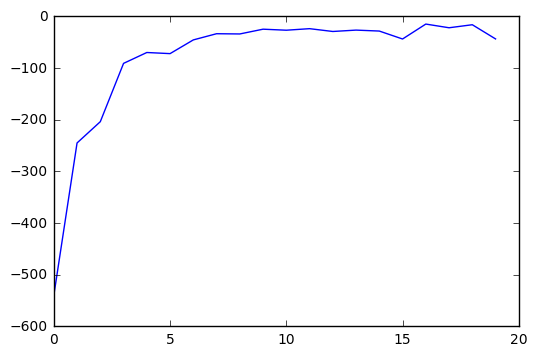

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt_dat = np.genfromtxt('params_2000/dbn_params_pretrain/lproxy_layer_2.csv', delimiter=',', names = True)[:20]
plt.plot(plt_dat)
plt.show()

## This demonstrates the pretraining procedure of a Deep Belief Net (DBN)
## [unsupervised]

In [4]:
model = deepbeliefnet(architecture = [2756, 500, 500, 128])
model.pretrain(input = x, pretraining_epochs = 10, output_path = 'params/to_delete')

... building the model
Building layer: 0
   Input units: 2756
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
... getting the pretraining functions
... pre-training the model
Pre-training layer 0, epoch 0, cost  -221993.0
Pre-training layer 0, epoch 1, cost  -220703.0
Pre-training layer 0, epoch 2, cost  -220447.0
Pre-training layer 0, epoch 3, cost  -220204.0
Pre-training layer 0, epoch 4, cost  -219999.0
Pre-training layer 0, epoch 5, cost  -219817.0
Pre-training layer 0, epoch 6, cost  -219653.0
Pre-training layer 0, epoch 7, cost  -219516.0
Pre-training layer 0, epoch 8, cost  -219367.0
Pre-training layer 0, epoch 9, cost  -219201.0


The pretraining for layer 0 ran for 0.98m


Pre-training layer 1, epoch 0, cost  -476.986
Pre-training layer 1, epoch 1, cost  -403.897
Pre-training layer 1, epoch 2, cost  -375.644
Pre-training layer 1, epoch 3, cost  -377.482
Pre-training layer 1, epoch 4, cost  -369.143
Pre-training layer 1, epoch 5, cost  -360.756
Pre-training layer 1, epoch 6, cost  -349.57
Pre-training layer 1, epoch 7, cost  -355.625
Pre-training layer 1, epoch 8, cost  -367.482
Pre-training layer 1, epoch 9, cost  -366.158


The pretraining for layer 1 ran for 1.32m


Pre-training layer 2, epoch 0, cost  -390.471
Pre-training layer 2, epoch 1, cost  -307.958
Pre-training layer 2, epoch 2, cost  -214.608
Pre-training layer 2, epoch 3, cost  -138.266
Pre-training layer 2, epoch 4, cost  -88.4542
Pre-training layer 2, epoch 5, cost  -62.165
Pre-training layer 2, epoch 6, cost  -89.8151
Pre-training layer 2, epoch 7, cost  -61.083
Pre-training layer 2, epoch 8, cost  -79.6391
Pre-training layer 2, epoch 9, cost  -46.3448


The pretraining for layer 2 ran for 1.54m


### Generating features from the unsupervised pretrained DBN

In [8]:
model = deepbeliefnet(architecture = [2756, 500, 500, 128], opt_epochs = [900,5,10],
                      predefined_weights = 'params/dbn_params')
output = model.score(input = x)

... building the model
Building layer: 0
   Input units: 2756
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
Previously defined model from "params/dbn_params" loaded.


In [10]:
colnames = ['bit'] * 128
colnames = [colnames[i] + str(i) for i in range(128)]
colnames.insert(0,'_label_')
pd.DataFrame(data = np.c_[dat_y, output], 
             columns = colnames). \
             to_csv( 'data/dbn_features.csv', index = False)

## This demonstrates the conversion of a DBN into an MLP and training it w.r.t. to targets
## [supervised]

In [5]:
model = deepbeliefnet(architecture = [2756, 500, 500, 128], opt_epochs = [900,5,10], n_outs = 20, predefined_weights = 'params/dbn_params')
#model.train(x=x, y=y,batch_size = 70, training_epochs = 10, output_path = 'params/to_delete')
model.train(x=x, y=y, training_epochs = 10000, learning_rate = (1/70)/2, batch_size = 120,
            drop_out = [0.2, .5, .5, .5], output_path = 'params/dbn_params_dropout')

... building the model
Building layer: 0
   Input units: 2756
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
Previously defined model from "params/dbn_params" loaded.
... getting the finetuning functions
... finetuning the model
epoch 1, minibatch 101/101, validation error 94.347826 %
     epoch 1, minibatch 101/101, test error of best model 94.327957 %
Saving model...
...model saved.
epoch 2, minibatch 101/101, validation error 93.478261 %
     epoch 2, minibatch 101/101, test error of best model 93.682796 %
Saving model...
...model saved.
epoch 3, minibatch 101/101, validation error 92.644928 %
     epoch 3, minibatch 101/101, test error of best model 92.849462 %
Saving model...
...model saved.
epoch 4, minibatch 101/101, validation error 91.956522 %
     epoch 4, minibatch 101/101, test error of best model 92.204301 %
Saving model...
...model saved.
epoch 5, minibatch 101/101, validation error 9

KeyboardInterrupt: 